In [0]:
import numpy as np
import pandas as pd
import databricks.koalas as ks

In [0]:
df = ks.read_csv('/mnt/datasets/twitter3/aug.csv', sep='\t')

In [0]:
df['tweet_id']=df['tweet_id'].astype(int)

In [0]:
df['date']=ks.to_datetime(df['date'])

/databricks/spark/python/pyspark/sql/pandas/functions.py:386: UserWarning: In Python 3.6+ and Spark 3.0+, it is preferred to specify type hints for pandas UDF instead of specifying pandas UDF type which will be deprecated in the future releases. See SPARK-28264 for more details.
 warnings.warn(

In [0]:
lang_count=df['lang'].value_counts()

In [0]:
lang_count

Out[6]: en 4084049
es 999723
in 452520
fr 354664
und 256321
th 219080
ja 213996
pt 164489
tl 66451
tr 65296
de 61493
it 45571
nl 31595
hi 22220
ca 17364
ar 13094
ru 11341
pl 11241
zh 9851
el 7295
fa 7181
ta 5576
ko 5520
sv 3732
ro 3480
lv 3023
et 2972
fi 2706
da 2639
ht 2242
ur 2142
cs 1952
mr 1941
vi 1774
uk 1724
sl 1707
si 1641
bn 1261
kn 1145
hu 1029
eu 987
gu 949
te 859
iw 814
no 775
or 711
cy 705
lt 675
ml 674
my 428
sr 401
ne 360
bg 339
is 205
pa 162
dv 81
lo 79
ps 69
am 54
km 43
ka 17
sd 11
hy 9
lang 6
ckb 5
ug 2
Name: lang, dtype: int64

In [0]:
df2 = df.groupby(by = ['date','tweet_id'])['tweet_id'].count().to_frame(name='count').reset_index()

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
df2['tweet_id']=df2['tweet_id'].astype(float)

In [0]:
df2['date']=df2['date'].astype(int)

In [0]:
pip install yellowbrick

Python interpreter will be restarted.
Collecting yellowbrick
 Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)
Requirement already satisfied: matplotlib!=3.0.0,>=2.0.2 in /databricks/python3/lib/python3.8/site-packages (from yellowbrick) (3.2.2)
Requirement already satisfied: scipy>=1.0.0 in /databricks/python3/lib/python3.8/site-packages (from yellowbrick) (1.5.2)
Requirement already satisfied: cycler>=0.10.0 in /databricks/python3/lib/python3.8/site-packages (from yellowbrick) (0.10.0)
Requirement already satisfied: numpy<1.20,>=1.16.0 in /databricks/python3/lib/python3.8/site-packages (from yellowbrick) (1.19.2)
Requirement already satisfied: scikit-learn>=0.20 in /databricks/python3/lib/python3.8/site-packages (from yellowbrick) (0.23.2)
Requirement already satisfied: python-dateutil>=2.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib!=3.0.0,>=2.0.2->yellowbrick) (2.8.1)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib!=3.0.0,>=2.0.2->yellowbrick) (1.3.0)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib!=3.0.0,>=2.0.2->yellowbrick) (2.4.7)
Requirement already satisfied: six in /usr/local/lib/python3.8/site-packages (from cycler>=0.10.0->yellowbrick) (1.15.0)
Requirement already satisfied: joblib>=0.11 in /databricks/python3/lib/python3.8/site-packages (from scikit-learn>=0.20->yellowbrick) (0.17.0)
Requirement already satisfied: threadpoolctl>=2.0.0 in /databricks/python3/lib/python3.8/site-packages (from scikit-learn>=0.20->yellowbrick) (2.1.0)
Installing collected packages: yellowbrick
Successfully installed yellowbrick-1.3.post1
WARNING: You are using pip version 20.2.4; however, version 21.2.4 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-18263ec8-bb25-4346-bf53-6bfa7dc6d153/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.

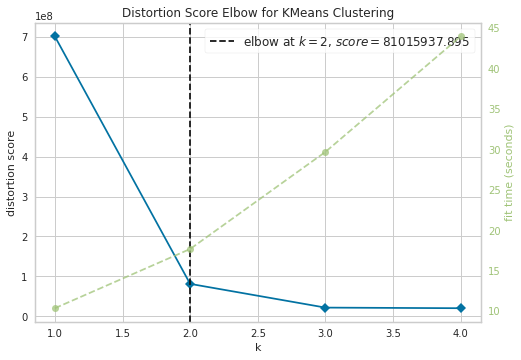

Out[1]: <matplotlib.axes._subplots.AxesSubplot at 0x7fc5ff752820>

In [0]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 2 random clusters
X, y = make_blobs(n_samples=7172461, n_features=3, centers=3, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,5))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [0]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 2)

X=df2.to_numpy()

label = kmeans.fit_predict(X)

In [0]:
(unique, counts) = np.unique(label, return_counts=True)
frequencies = np.asarray((unique, counts)).T

In [0]:
frequencies

Out[15]: array([[ 0, 4781641],
 [ 1, 2390820]])

In [0]:
p0=2390820/7172461

In [0]:
p0

Out[17]: 0.33333328685928026

In [0]:
p1=4781641/7172461

In [0]:
p1

Out[8]: 0.6666667131407198

In [0]:
print(X)

[[-6.59451375 6.52237995 2.3497377 ]
 [-2.39234588 9.22099281 4.23930678]
 [-1.88928426 8.14006938 4.08456524]
 ...
 [ 3.32593018 -6.425262 -8.09204947]
 [ 3.11341313 -7.24433591 -6.35473397]
 [-2.54286216 8.30683061 4.52224713]]

In [0]:
print(label)

[0 0 0 ... 1 1 0]

In [0]:
print(X[label])

[[-6.59451375 6.52237995 2.3497377 ]
 [-6.59451375 6.52237995 2.3497377 ]
 [-6.59451375 6.52237995 2.3497377 ]
 ...
 [-2.39234588 9.22099281 4.23930678]
 [-2.39234588 9.22099281 4.23930678]
 [-6.59451375 6.52237995 2.3497377 ]]

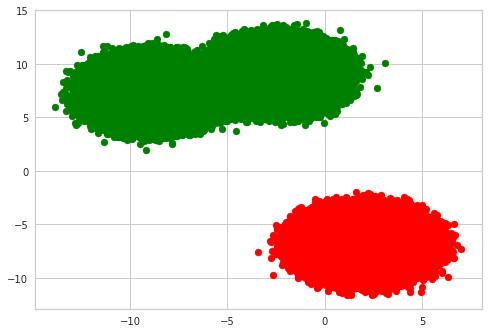

In [0]:
#filter rows of original data
filtered_label2 = X[label == 0]
 
filtered_label8 = X[label == 1]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'green')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'red')
plt.show()